# Simulating solutions to differential equations

## Recap

Does the knowledge ever stop? (No.) Allow me to remind you of our amazing toolbox of science-relevant PHY 220 computation competencies:
- basic mathematical operations, comparison operators
- iteration and recursion with loop control structures `for` and `while`
- keeping track of variables outside of loops (i.e., counting and summing)
- function definition and using functions *inside* of loops
- conditionals with `if`, `else`, and `elif`
- types: `int`, `float`, `string`, `bool`
- containers such as `list` and `dict`
- randm number generation
- accessing and iterating over elements in lists and dicts
- file I/O
- basic (and semi-advanced) data visualization: histograms, scatter plots, higher-dimensions in 2-d
- fitting models to data and extracting results (with uncertainties)
- text analysis, asking questions with unstructured data
- DEBUGGING!

**Wow**, that's a LOT of stuff.  Holy moly, are these skills marketable!

***

## Motivation

In this lesson, we'll be studying the simulation of solutions to differential equations.  **Wait, no -- don't run out the door screaming!** This will be a gentle reminder/introduction to what differential equations are/do, and then we'll present a fairly general approach to simulating their solutions.  Why?  Well, check out:
- [The Belousov-Zhabotinsky (BZ) chemical reaction](https://www.youtube.com/watch?v=o72GGxQqWt8) or [another video](https://www.youtube.com/watch?v=jRQAndvF4sM)
- [Video-game physics engines](https://en.wikipedia.org/wiki/Physics_engine)!  [For example](https://www.youtube.com/watch?v=3jt__MP4IzE&ab_channel=RetroGame.Stream)
- [Climate modeling based on Navier-Stokes equation](https://physicsworld.com/a/a-model-approach-to-climate-change/)

In a very real way, differential equations *are* our understanding of the *dynamic* natural world!

***

## Ordinary Differential Equations

An **ordinary differential equation** (ODE) is an equation that relates a function of one variable, $f(x)$, to its derivatives, $f'(x)$, $f''(x)$, $f'''(x)$, ...

That's it! Thanks for stopping by!

Next section, please!

***

## ODEs by example

Ok, so the previous section wasn't that helpful.  The point that I want to make in this lesson is that differential equations arise very naturally in the analysis of physical, chemical, financial, biological, social, and many other types of systems.  Let's see what differential equations can do for us by examining a "simple" example.  Even if you've not worked with differential equations before, let alone taken a DE course, you should be able to follow with this notebook. We'll work with DEs as *algebraic* rather than *calculus* entities.

Let's consider the case of a colony of bacteria growing in a petri dish.  Assume that we know the initial conditions of our experiment: the number of bacteria $N_0$ at time $t=0$.  We want to do some analysis to determine a functional dependence of the number of bacteria on time, $N(t)$ -- the outcome of this analysis will be a **function**!  We know that in some amount of time $\Delta t$, the population grows by some *relative* rate, $\gamma$.  Let me write out what this means in an equation: 

$$ \Delta N = \gamma \; (\Delta t)\; N(t)$$

We call this a "difference equation" because it relates finite differences in the quantities $t$ and $N$.  This equation tells us how we expect $N$, the number of bacteria to change in any given time interval $\Delta t$: $\Delta N$ is proportional to the rate $\gamma$, the amount of time elapsed $\Delta t$, and the current number of bacteria $N(t)$.

Please think about these dependencies for a moment.  The change in $N$ depends on how long we wait, how fast the bacteria reproduce, and **how many bacteria** there are.  The latter of these is the interesting one -- a larger population will increase more!

Let's rearrange our difference equation a bit:

$$ \frac{\Delta N}{\Delta t} = \gamma N(t) $$

OK, looking interesting.  Now, what happens to the difference equation if we consider $\Delta t$ to be short?  You know, like infinitesimal?  A slight change in notation, $\Delta t \rightarrow dt$ and $\Delta N \rightarrow dN$ yields

$$ \frac{dN(t)}{dt} = \gamma N(t) $$

Wow, that's one of those differential equations things!  This is an equation that relates the first-order time derivative of $N(t)$ to the function itself!  Solving this differential equation means finding a function $N(t)$ that satisfies the equation.  In words, this DE tells us that $N(t)$ is a function that is equal to $1/\gamma$ of its derivative.

Thinking for a few moments yields the solution $N(t) = ae^{\gamma t}$, where $a$ is some constant.  Exponential growth!  To match the initial conditions, we would set $a = N_0$.  So, the solution to this DE that also satisfies the initial conditions is 

$$ N(t) = N_0 e^{\gamma t} $$

If you're interested in techniques for solving differential equations (other than just magically thinking up a solution) consider taking a course in Mathematical Physics, or Differential Equations offered by your friendly local Mathematics Department.

***

## ODEs, again

**So**, what is a differential equation?  It's an equation that relates a function to its derivatives.  What is the **solution to a differential equation**?  It's a function!  In the example above, our solution is the *function* $N(t)$.  When we have this solution, we can know the behavior of the system at all future times.  In this example and many other situations, the differential equation arises naturally from the properties of a system.

***

## Solving ODEs numerically

The above example was an easy one.  Very rarely does an interesting physical system present a differential equation with a "nice" solution.  In many branches of science, we have to rely on computers to *simulate* the behavior of a system from the differential equation that describes it.

Let's return to the exponential growth example from above.  Recall the difference equation:

$$ \Delta N = \gamma N(t) (\Delta t)$$

To "solve" for $N(t)$ numercially, we wish to predict the value of $N(t)$ at all future times.  We'll do this incrementally.  Let's put some numbers into our system.  Let our growth constant $\gamma = 10^{-4}$ s$^{-1}$ and $N(t = 0) = N_0 = 10^4$.

If we choose a small value for $\Delta t$, we can *approximate* the value of $N$ at $t = 0 + \Delta t$ using the difference equation:

$$N(0 + \Delta t) = \gamma N(0) (\Delta t)$$

In fact, we can generalize this relationship to calculate $N$ at any $t+\Delta t$ from $N$ at $t$:

$$ N(t + \Delta t) = \gamma N(t) (\Delta t)$$

Well, heck!  This just sounds like recursion!  Let's choose $\Delta t = 10^{-1}$ s and code this process to approximate the value of $N(t)$ for a total of 6 hours.  In the code below, I'm going to use `dt` as the variable shorthand for $\Delta t$.

In [1]:
gamma = 1e-4
t = 0
tf = 6 * 60 * 60
n0 = 1e4
n = n0
dt = 1e-1

t_vals, n_vals = [], []
t_vals.append(t)
n_vals.append(n)

while t < tf:
    dn = gamma * n * dt
    n = n + dn
    t = t + dt
    t_vals.append(t)
    n_vals.append(n)

And let's check our handy work by graphing the values of $N$ vs $t$ along with the theoretical (analytical) solution!

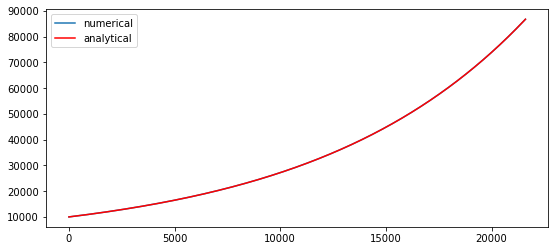

In [2]:
import matplotlib.pyplot as plt
import numpy as np

t_vals = np.array(t_vals)
n_vals = np.array(n_vals)

def theo_solution(t):
    return n0 * np.exp(gamma * t)

theo_n_vals = theo_solution(t_vals)

fig = plt.figure(figsize=(9,4))
plt.plot(t_vals, n_vals, label='numerical')
plt.plot(t_vals, theo_n_vals, '-r', label='analytical')
plt.legend()
plt.show()

Now, if it looks to you like there's only one set of data points plotted above... that's because the theoretical/analytical solution is RIGHT ON TOP of the numerical solution!  Yeah, baby!

Having a numerical solution isn't as satisfying as having the **functional form** of an analytical solution.  However, it is CRITICALLY important to state that there very simple systems for which no analytical solution is possible, and we must resort to numerical solution to predict the future.  If this makes you uncomfortable, you're in good company.

***

#### Warm up: Completely context-free example

Let's simulate the solution to the following first-order ordinary differential equation:

$$
  \frac{df}{dt} = -(0.1) f^2 + 0.5 f + 0.2
$$

Use $\Delta t = 10^{-3}$ and $f(0) = 0$ as an initial condition.  Simulate between $t = 0$ and $t = 20$ s.

In [3]:
## warm-up code goes here

***

#### Warm up: Rumor spread through a population

Let $f(t)$ be the fraction of a population that have heard a rumor as a function of time.  A simple model for how this rumor (or a meme, or a virus, *etc.*) spreads through the population is that the rate of spread is proportional to the product of the fraction of people who have heard the rumor and the fraction of people who have not heard the rumor.  [Think about this for a minute!]  Mathematically, we write this as

$$
  \frac{df}{dt} = \beta f (1-f) 
$$

where $\beta$ is the proportionality/transmission constant.  In this model, $\beta$ essentially quantifies how transmissable (or "juicy") the rumor/meme/virus is.

This is a hard one to solve!  Yowza.  But we can simulate the solution quite easily.  Assume that at $t = 0$, $f = 0.25$ and $\beta = 0.01$.  Simulate the spread until $f = 0.90$.  

In [4]:
## warm-up code goes here

Congratulations!  You're now a theoretical epidemiologist (kinda).

***

#### Does this look familiar?

If you've attended this class in the past, you might notice similarities between the code above for simulating ODE solutions and the stuff we did in Lesson 1 with numerical integration.  SURPRISE -- they're basically the same thing, especially for first-order ODEs.  That means that all of the same considerations from Lesson 1 (choosing the correct integration step size, *etc*.) apply here.

***

## Higher-order ODEs and the Euler Algorithm

Hey, have you heard of this thing Newton's Second Law?  It's pretty good at describing how the forces acting on an object influence its motion... you know, dynamics!  Recall that N2L looks like this:

$$
  \displaystyle \sum \vec{F} = m\frac{d^2\vec{r}}{dt^2}
$$

Just to remind you, N2L relates the forces acting on a particle (the left-hand side) to the motion of a particle.  In many systems, the forces that act on a particle depend on the position of the particle, meaning that the LHS of N2L will include $\vec{r}$.  The LHS might even include forces that depend on $\vec{v} = d\vec{r}/dt$.  BAM!  A second-order ODE which relates the second and first derivative(s) of position to the position.

Let's look at a more concrete example.  Consider a mass connected to a horizontal spring with spring constant $k$.  The mass can slide on a horizontal frictionless surface.  We'll establish a $y$-axis along the mass' direction of motion, with $y = 0$ at the mass' equilibrium point.  Applying N2L yields

$$
  \displaystyle \sum F_y = -k y(t) = m \frac{d^2 y(t)}{dt^2} \longrightarrow \frac{d^2 y(t)}{dt^2} = -\frac{k}{m} y(t)
$$

To solve this, we seek a position function $y(t)$ which satisfies this equality.  Perhaps you can guess or remember it?

If we try our previous simulation technique, though, we're stuck!  The ODE tells us the value of the *second* derivative of $y(t)$, but... how do we use this to find the *change* in $y$?!

There are actually many different approaches to this problem.  We will choose the easiest of these, the so-called Euler Algorithm.  The approach is to break the second-order ODE into *two* first-order ODEs by inventing two "new" quantities:

$$
  u_1(t) = y(t)
$$
$$
  u_2(t) = \frac{dy(t)}{dt}
$$

We can then use our original ODE to write ODEs for $u_1$ and $u_2$:

$$
  \frac{du_1(t)}{dt} = u_2
$$
$$
  \frac{du_2(t)}{dt} = -\frac{k}{m} u_1
$$

Splitting one DE into two DEs may seem like it {\em doubles} the complication of the system, but it actually provides a more straight-forward way to implement the calculation.
We first turn these differential equations into difference equations:

$$
  \frac{\Delta u_1}{\Delta t} = u_2 \longrightarrow \Delta u_1 = u_2 \Delta t
$$
$$
  \frac{\Delta u_2}{\Delta t} = -\frac{k}{m} u_1 \longrightarrow \Delta u_2 = \left(-\frac{k}{m} u_1 \right)\Delta t
$$

If we are given the initial values of position, $y(0) = u_1(0)$, and velocity, $y'(0) = u_2(0)$, then we have everything we need to use the difference equations to calculate the changes in $u_1$ and $u_2$.

To be clear, the Euler Algorithm for a second-order ODE will be to do the following at each step in the simulation:
1. calculate $\Delta u_2$
1. update $u_2$ with $u_2 = u_2 + \Delta u_2$
1. calculate $\Delta u_1$
1. update $u_1$ with $u_1 = u_1 + \Delta u_1$
1. update $t$ with $t = t + \Delta t$
1. REPEAT

Super duper.
To put this in physics lingo, we're going to calculate the acceleration, update the velocity, and update the position.

Let's try it!  We'll assume that $m = 1.0$, $k = 12.0$, $y(0) = 0.15$, and $y'(0) = 0.0$, all in SI units :^)   Let's simulate for $12.0$ seconds.

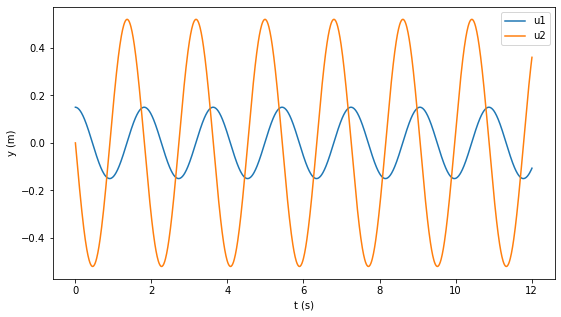

In [5]:
y0 = 0.15
k = 12.0
m = 1.0
t = 0
tf = 12.0
dt = 0.01
u1 = y0
u2 = 0.0

t_vals, u1_vals, u2_vals = [t], [u1], [u2]

while t <= tf:
    du2 = - k / m * u1 * dt
    u2 = u2 + du2
    u2_vals.append(u2)
    du1 = u2 * dt
    u1 = u1 + du1
    u1_vals.append(u1)
    t = t + dt
    t_vals.append(t)
    
fig = plt.figure(figsize=(9,5))
plt.plot(t_vals, u1_vals, label='u1')
plt.plot(t_vals, u2_vals, label='u2')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.legend()
plt.show()

Nice!  Oscillatory, simple harmonic motion!  

***

What if we complicate the system by adding a drag force that is proportional to the object's velocity?  We could do this simply by modifying the original ODE:

$$
  \displaystyle \sum F_y = -k y - b \frac{dy}{dt} = m \frac{d^2 y}{dt^2}
$$ 

This makes the ODE much harder to solve with pencil and paper, but our simulation is trivially easy to adapt.  So easy, in fact, that we'll do it in a warm-up problem...

#### Warm-up problem.  

Modify the simulation code above to include a drag force with drag coefficient $b = 0.6$.

In [6]:
## warm-up code goes here!

***

It should be noted that this is only *one* way to simulate the solution to a second-order differential equation.
The Euler algorithm/method relies on using the value of acceleration at $t$ to determine the velocity and position at time $t+\Delta t$.  This is an approximation based on a very simple understanding of how a derivative works.
There are other (more sophisticaed) ways to do updating/simulations such as this, many of which give better performance for some physical systems -- if interested you can check out the Runge-Kutta method(s) or Leapfrog integration.

It would be difficult to overstate the power of this approach.  Differential equation simulation is used for everything from making Mario (the plumber) move realistically, to determining how fast a computer processor can run before overheating, to designing rocket engines.

***

## Problems 

Your homework for next week is to complete three (3) of the following problems.

### Regulars

#### Problem 0
The population of a system experiences growth according to the following ODE

$$ 
  \frac{dN}{dt} = \lambda N - \eta N \cos (t / 12) 
$$

where $\lambda = 0.002$ and $\eta = 0.0065$.  The system begins with $N(0) = 10^5$.  Graph the population of the system vs $t$ for $t \in [0, 200]$.  Determine how long it takes for the population to increase by a factor of 10.

#### Problem 1
A simple, single-loop DC circuit contains a capacitor with $C = 0.15$ $\mu$F, a resistor with $R = 120$ k$\Omega$, a $10$-V battery, and a switch.  At $t = 0$, the capacitor is uncharged and the switch is closed.  Applying Kirchoff's loop rule yields the following equation:

$$ 
  (10 \textrm{ V}) - IR - CQ = 0
$$

where $I$ is the current in the circuit and $Q$ is the charge on the capacitor.  You may recall that $dQ/dt = I$.  Write a simulation of $Q(t)$ and graph $Q(t)$ vs $t$ from $t = 0$ up to the time at which the voltage across the capacitor reaches $90\%$ of its maximum value.

#### Problem 2
A quesadilla ($m = 0.240$ kg) is dropped from an initial height of $100$ m.  As it falls, it experiences a vertical force described by 

$$ 
  \displaystyle \sum F_y = - mg - b y' 
$$

where the second term is a drag force with drag coefficient $b = 0.3$.
How long does it take the quesadilla to reach the ground?
What is its speed at the instant that it strikes the ground?

#### Problem 3
A pebble is dropped vertically into a pond such that its speed as it enters is $25.0$ m/s.  The force on the pebble once it enters the water is given by

$$ 
  \displaystyle \sum F_y = - mg + d (y')^2 
$$

where $d = 0.1$ is a drag coefficient.  Notice that the drag force for the liquid water has a different functional form than the drag force in the previous problem.
Simulate the position of the pebble in the water and graph it as a function of time.  Approximate the pebble's terminal speed.

### Meanies

#### Problem 4
At Willy Wonka's candy factory, a $5.0\times 10^4$-L tank initially contains $2.5\times 10^4$-L of a liquid mixture with a sugar concentration of $50\%$.  $2.0$ L of the fluid drains out of the tank per second.  More liquid with a $60\%$ sugar concentration is added to the tank at a rate of $3.4$ L/s.  Let $s(t)$ represent the amount of sugar in the tank as a function of time.  We can write the rate of change of $s$ as

$$
  \frac{ds}{dt} = (\textrm{rate of sugar in}) - (\textrm{rate of sugar out}) 
$$

Simulate the solution to this differential equation and graph $s(t)$ vs $t$.  Determine the amount of sugar in tank when the is full.

#### Problem 5
Flappy Bird has a mass of $0.233$~kg.  She falls from rest from an initial height of $100$ m.  During her fall, she flaps her wings once every three seconds (*i.e.*, flap at 3 s, 6 s, 9 s, ...).  Each flap exerts an upward force of $4.0$ N for a duration of $0.50$ seconds.  Simulate FB's flight.  Does she eventually land on the ground?  If so, how long does her descent take?


#### Problem 6
A particle ($m = 1.0$ kg) moves along the $x$-axis under a force described by the following: If $x > 1.0$ m, $F_x = - 10$ N. If $x < -1.0$ m, $F_x = + 10$ N. If $|x| \leq 1.0$ m, $F_x = 0$.
At $t = 0$ the particle has $x(0) = 0$ and $x'(0) = 14.2$ m/s.  Simulate the particle's motion for $t\in [0, 40]$ s.

#### Problem 7
Return to the rumor/virus-spread example from the warm-up problem above.  Using the model given and $f(t = 0) = 0.10$ and $\beta = 0.0002$, make a graph of the number of new cases per unit time versus time.  Hint: The warm-up problem graphs the *cumulative* cases versus time -- how is this related to the number of new cases per unit time?

### Chemistry super-meanie

#### Problem 8
A [multi-step reaction](http://www.idea.wsu.edu/ChemKinetics/mechanism.htm) involving 4 molecules ($A$, $X$, $Y$, $Z$) proceed by the following reactions:
- Reactant $A$ rearranges to intermediate $X$ with rate $k_1$: $A\rightarrow X$
- $X$ decomposes to intermediate $Y$ with rate $k_2$: $X\rightarrow Y$
- $X$ decomposes to intermediate $Y$ with rate $k_2$: $X\rightarrow Y$
- $Y$ catalyzes the rearrangement of $A$ to intermediate $X$ with rate $k_3$: $A + Y \rightarrow Y+X$
- $Y$ decomposes to final product $Z$ with rate $k_4$: $Y\rightarrow Z$

We consider the functions $a(t)$, $x(t)$, $y(t)$, and $z(t)$ to give the concentrations of each of these molecules as functions of time.
This process is then modeled by 4 differential equations:

$$
  \frac{da}{dt} = -k_1 a - k_3 a y
$$
$$
  \frac{dx}{dt} = k_1 a - k_2 x + k_3 a y 
$$
$$
  \frac{dy}{dt} = k_2 a - k_4 y 
$$
$$
  \frac{dz}{dt} = k_4 y
$$

Using the values $k_1=1$, $k_2=0.5$, $k_3=0.1$, $k_4=0.1$, $a(0) = 1$, and $x(0)=y(0)=z(0)=0$, simulate the concentrations of the molecules until the system reaches a stable equilibrium.  Graph the four concentrations versus time on a single set of axes.